## 04. PyTorch Custom Datasets

In the last lesson (Notebook 03), we learned how to build computer vision models using one of PyTorch’s built-in datasets: **FashionMNIST**.

The process we followed is common across many machine learning problems:

1. Find a dataset.
2. Turn the dataset into numbers.
3. Build (or use an existing) model to learn patterns in those numbers.
4. Use the model for prediction.

PyTorch provides many **built-in datasets** for research and benchmarking (e.g., `MNIST`, `CIFAR10`, `ImageNet`), but in real-world projects, you’ll often need to work with your **own data**.

This is where **custom datasets** come in.

---

### What is a Custom Dataset?

A **custom dataset** is a collection of data tailored to the specific problem you are solving.

It can be made up of almost anything — images, text, audio, tabular data, or even user interactions.

#### Examples:

* If we were building a **food image classification app** (like *Nutrify*), our custom dataset might consist of **images of food**.
* If we were building a **sentiment analysis model**, our custom dataset might consist of **customer reviews** paired with labels (positive or negative).
* If we were building a **sound classification app**, our custom dataset might consist of **audio recordings** paired with their categories.
* If we were building a **recommendation system**, our custom dataset might consist of **user purchase histories** or **product interactions**.

---

✅ In short:
A **custom dataset** = your own data formatted in a way PyTorch can use for training.

In [1]:
import torch
from torch import nn

torch.__version__

'2.2.2'

In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")

image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"Did not find {image_path} directory, creating one ...")

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data ...")

        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data ...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists


In [4]:
# import os
# def walk_through_dir(dir_path):
#   """
#   Walks through dir_path returning its contents.
#   Args:
#     dir_path (str or pathlib.Path): target directory
  
#   Returns:
#     A print out of:
#       number of subdiretories in dir_path
#       number of images (files) in each subdirectory
#       name of each subdirectory
#   """
#   for dirpath, dirnames, filenames in os.walk(dir_path):
#     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
# walk_through_dir(image_path)

In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [7]:
SEED = 42

Random image path: data/pizza_steak_sushi/test/pizza/2236338.jpg
Image class: pizza
Image height: 512
Image width: 512


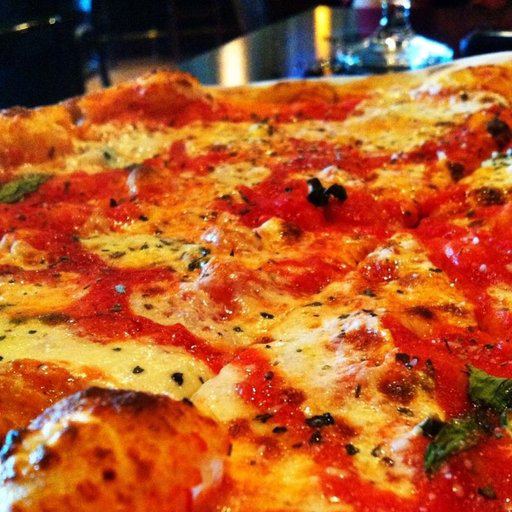

In [8]:
import random
from PIL import Image

random.seed(SEED)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)abs
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

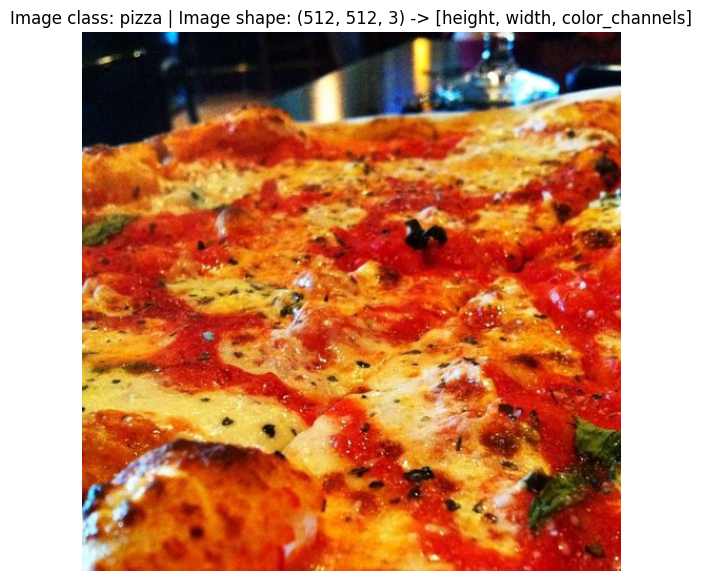

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [10]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
data_transform = transforms.Compose([transforms.Resize(size=(64, 64)), 
                                    transforms.RandomHorizontalFlip(0.5), 
                                    transforms.ToTensor()])

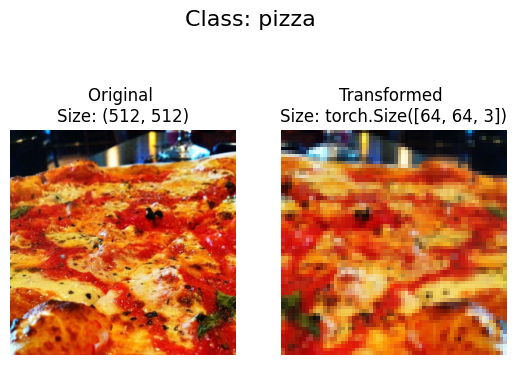

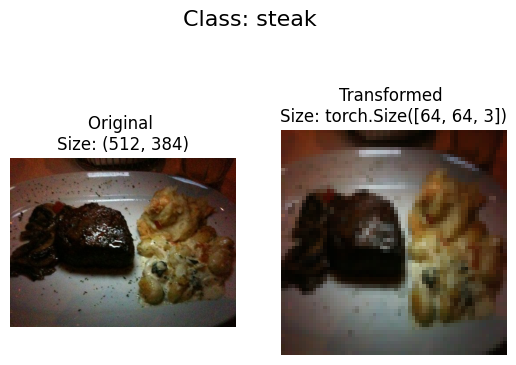

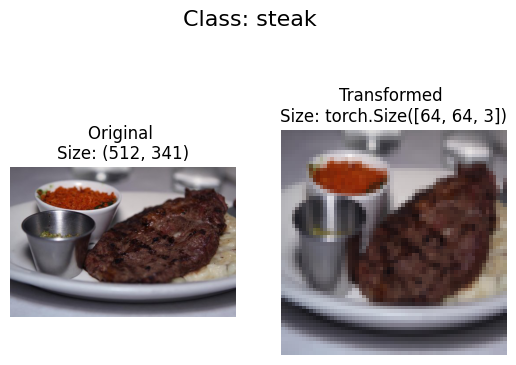

In [12]:
def plot_transformed_images(image_paths, transform, n=3, seed=SEED):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)

    random_image_path = random.sample(image_paths, k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [13]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                            transform=data_transform)

print(f"Train data: \n{train_data}\nTest data\n{test_data}")

Train data: 
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data
Dataset ImageFolder
    Number of datapoints: 85
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [14]:
train_dir

PosixPath('data/pizza_steak_sushi/train')

In [15]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
class_dict = train_data.class_to_idx

In [17]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
len(train_data), len(test_data)

(225, 85)

In [19]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

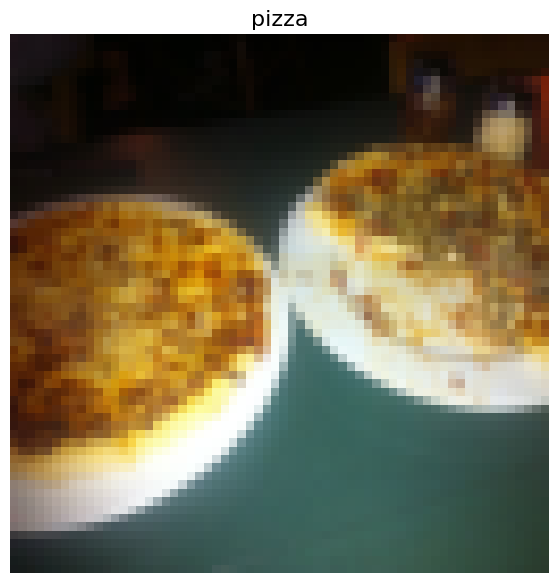

In [20]:
# changing the image from (C, H, W) -> (H, W, C)
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# PLOT THE IMAGE
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=16)

In [21]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data, 
                               batch_size=1, 
                               num_workers=1, 
                               shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=1,
                            num_workers=1,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x129f107f0>,
 <torch.utils.data.dataloader.DataLoader at 0x129f7bfd0>)

In [22]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [23]:
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes: list[str] = None,
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = None):
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")


    if seed:
        random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)    

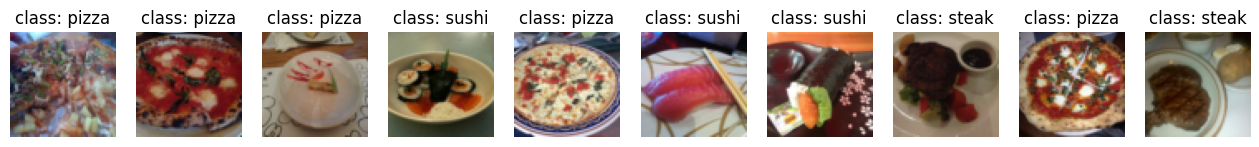

In [24]:
display_random_images(dataset=train_data, classes=class_names, n=10, display_shape=False)

In [25]:
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize((224, 224)),
                                     transforms.ToTensor()])

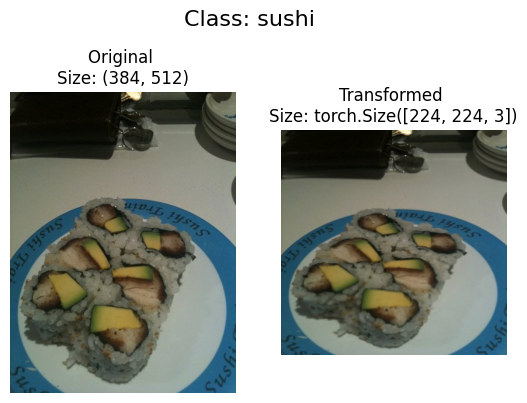

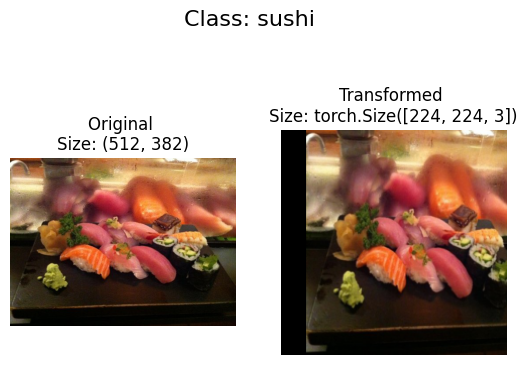

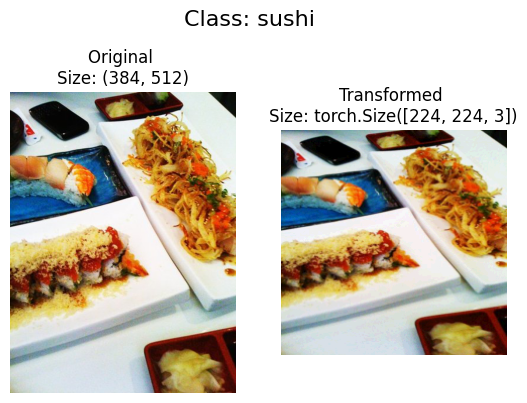

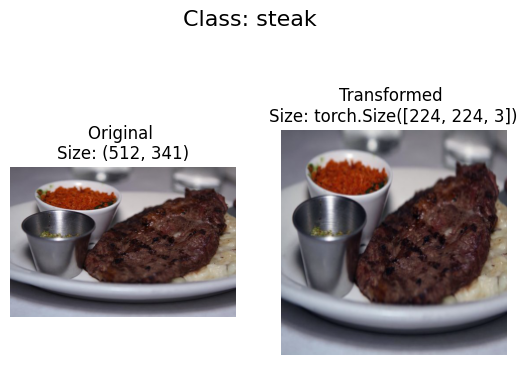

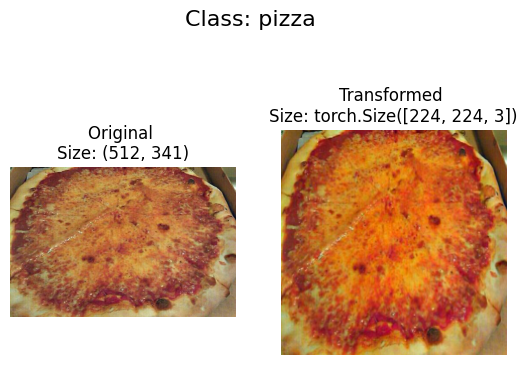

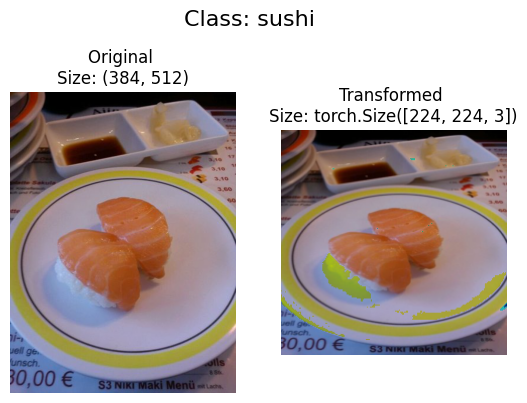

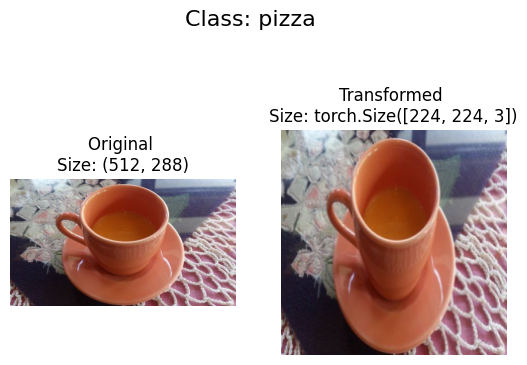

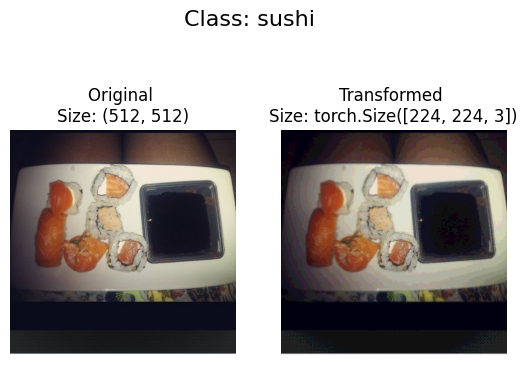

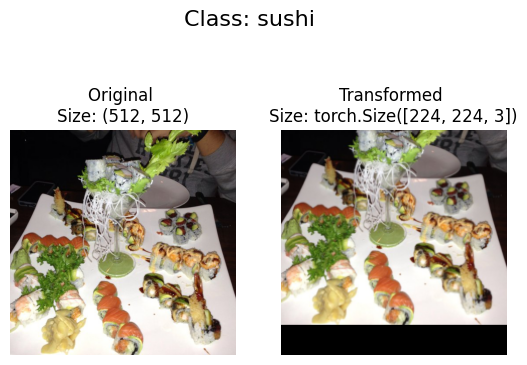

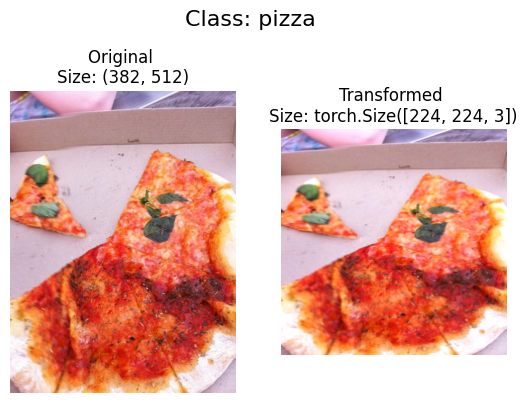

In [26]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

plot_transformed_images(image_paths=image_path_list, 
                        transform=train_transforms, 
                        n=10, 
                        seed=None)

In [27]:
simple_transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor()])

In [28]:
import os
from torch.utils.data import DataLoader
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating data loader with batch size: {BATCH_SIZE} and num of workers: {NUM_WORKERS}")

# Creating data loaders 
train_dataloader_simple = DataLoader(dataset=train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple, 
                                   batch_size=BATCH_SIZE,
                                   num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating data loader with batch size: 32 and num of workers: 8


(<torch.utils.data.dataloader.DataLoader at 0x12a41baf0>,
 <torch.utils.data.dataloader.DataLoader at 0x12a276d00>)

In [29]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                     kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )


        self.classfier = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=hidden_units * 16 * 16, out_features=output_shape)
        )


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)

        x = self.conv_block_2(x)

        x = self.classfier(x)

        return x

In [30]:
torch.manual_seed(SEED)

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [31]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0352]], device='mps:0')

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]], device='mps:0')

Output prediction label:
tensor([1], device='mps:0')

Actual label:
2


In [32]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [33]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               device: torch.device = device):
    model.train()

    train_acc, train_loss = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate and accumulate loss
        loss = loss_fn(y_pred, y)

        train_loss += loss.item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()


        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return {
        "train_loss": train_loss,
        "train_acc": train_acc
    }

In [34]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module, 
              device: torch.device = device):
    model.eval()

    test_loss, test_acc = 0, 0 

    with torch.inference_mode():
        # Loop through dataloader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred_logits = model(X)

            # Calculates loss and accumulate it
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/ len(test_pred_labels))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return {
        "test_acc": test_acc,
        "test_loss": test_loss
    }

In [35]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
         train_dataloader: torch.utils.data.DataLoader,
         test_dataloader: torch.utils.data.DataLoader,
         optimizer: torch.optim.Optimizer,
         loss_fn: torch.nn.Module,
         device: torch.device = device,
         epochs: int = 5):

    # results 
    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_results = train_step(model=model, 
                                   dataloader=train_dataloader, 
                                   optimizer=optimizer, 
                                   loss_fn=loss_fn, 
                                   device=device)
        
        test_results = test_step(model=model, 
                                 dataloader=test_dataloader, 
                                 loss_fn=loss_fn, 
                                 device=device)


        # 4. Print out what's happening
        print(
              f"Epoch: {epoch+1} | "
              f"train_loss: {train_results['train_loss']:.4f} | "
              f"train_acc: {train_results['train_acc']:.4f} | "
              f"test_loss: {test_results['test_loss']:.4f} | "
              f"test_acc: {test_results['test_acc']:.4f}"
        )
      
        results["train_loss"].append(train_results["train_loss"])
        results["train_acc"].append(train_results["train_acc"])
        results["test_loss"].append(test_results["test_loss"])
        results["test_acc"].append(test_results["test_acc"])

    return results 

/opt/anaconda3/envs/env_pytorch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
torch.manual_seed(SEED)
torch.mps.manual_seed(SEED)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer

start_time = timer()

model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader_simple,
    test_dataloader=test_dataloader_simple,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS,
    device=device
)

end_time = timer()

print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|█████████                                    | 1/5 [01:08<04:32, 68.00s/it]

Epoch: 1 | train_loss: 1.0975 | train_acc: 0.2500 | test_loss: 1.1029 | test_acc: 0.1979


 40%|██████████████████                           | 2/5 [02:15<03:22, 67.49s/it]

Epoch: 2 | train_loss: 1.0968 | train_acc: 0.3984 | test_loss: 1.1044 | test_acc: 0.1979


 60%|███████████████████████████                  | 3/5 [03:22<02:14, 67.45s/it]

Epoch: 3 | train_loss: 1.0983 | train_acc: 0.2930 | test_loss: 1.1040 | test_acc: 0.1875


 80%|████████████████████████████████████         | 4/5 [04:30<01:07, 67.49s/it]

Epoch: 4 | train_loss: 1.0963 | train_acc: 0.3828 | test_loss: 1.1056 | test_acc: 0.1979


100%|█████████████████████████████████████████████| 5/5 [05:37<00:00, 67.49s/it]

Epoch: 5 | train_loss: 1.0971 | train_acc: 0.2930 | test_loss: 1.1051 | test_acc: 0.1771
Total training time: 337.442 seconds


In [37]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [38]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    loss = results["train_loss"]
    test_loss = results["test_loss"]


    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    # plt.style.use("dark_background")

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accurcy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.legend();

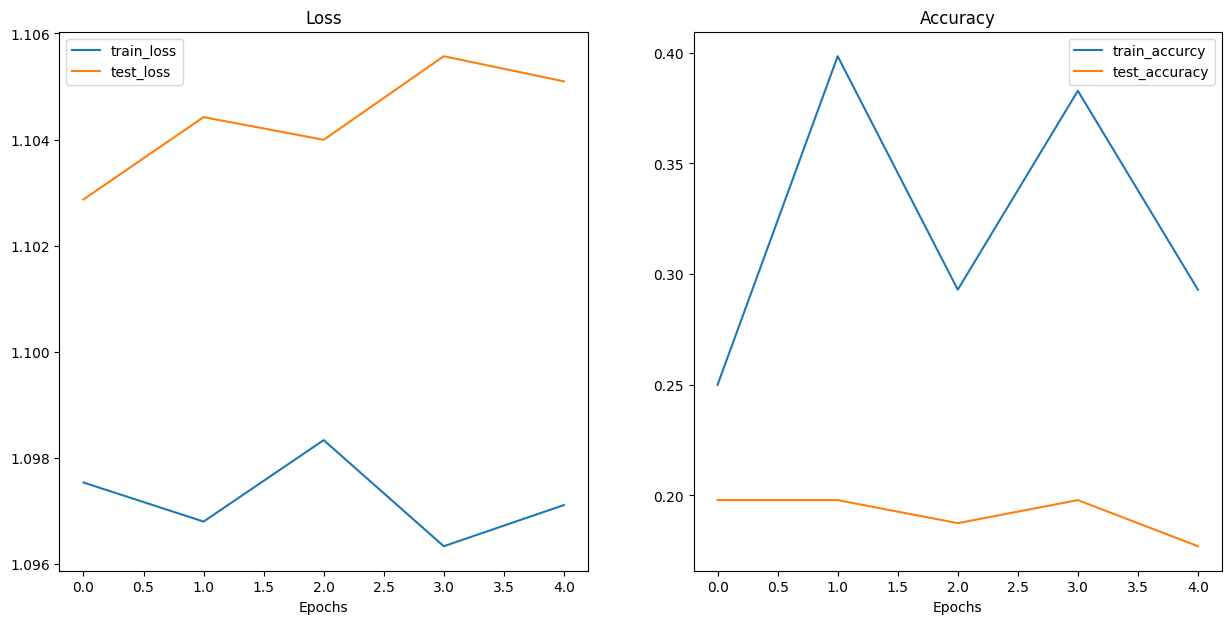

In [39]:
plot_loss_curves(model_0_results)

# building a model with augmentation

In [40]:
train_augment_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_augment_trivial_uagment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [41]:
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_augment_trivial_augment)
test_data_augmented = datasets.ImageFolder(test_dir, transform=test_augment_trivial_uagment)

In [42]:
import os 

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(SEED)

train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True, 
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented, 
                                       batch_size=BATCH_SIZE, 
                                       shuffle=False, 
                                       num_workers=NUM_WORKERS)
# train_dataloader_augmented = DataLoader(transforms)

In [43]:
train_data_augmented, test_data_augmented

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 85
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [44]:
# import matplotlib.pyplot as plt
# import numpy as np

# # plt.style.use("dark_background")
# t = np.linspace(0, 2 * np.pi, 1500)
# x = np.cos(t) * (1 + 0.6 * np.cos(20 * t))
# y = np.sin(t) * (1 + 0.6 * np.cos(20 * t))
# plt.scatter(x, y, c=t, cmap="spring", s=2)
# plt.axis("equal");
# plt.show()

In [45]:
torch.manual_seed(SEED)

model_1 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [46]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

NUM_EPOCHS = 5


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as timer

start_time = timer()

model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented, 
                        test_dataloader=test_dataloader_augmented, 
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        device=device,
                        epochs=NUM_EPOCHS)

end_time = timer()

print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|█████████                                    | 1/5 [01:07<04:29, 67.30s/it]

Epoch: 1 | train_loss: 1.0975 | train_acc: 0.4062 | test_loss: 1.1010 | test_acc: 0.3646


 40%|██████████████████                           | 2/5 [02:14<03:22, 67.35s/it]

Epoch: 2 | train_loss: 1.0963 | train_acc: 0.4258 | test_loss: 1.1007 | test_acc: 0.3646


 60%|███████████████████████████                  | 3/5 [03:23<02:16, 68.13s/it]

Epoch: 3 | train_loss: 1.0948 | train_acc: 0.4258 | test_loss: 1.1005 | test_acc: 0.3646


 80%|████████████████████████████████████         | 4/5 [04:31<01:07, 67.83s/it]

Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3047 | test_loss: 1.1021 | test_acc: 0.3646


100%|█████████████████████████████████████████████| 5/5 [05:39<00:00, 67.92s/it]

Epoch: 5 | train_loss: 1.0943 | train_acc: 0.4258 | test_loss: 1.1018 | test_acc: 0.3646
Total training time: 339.612 seconds


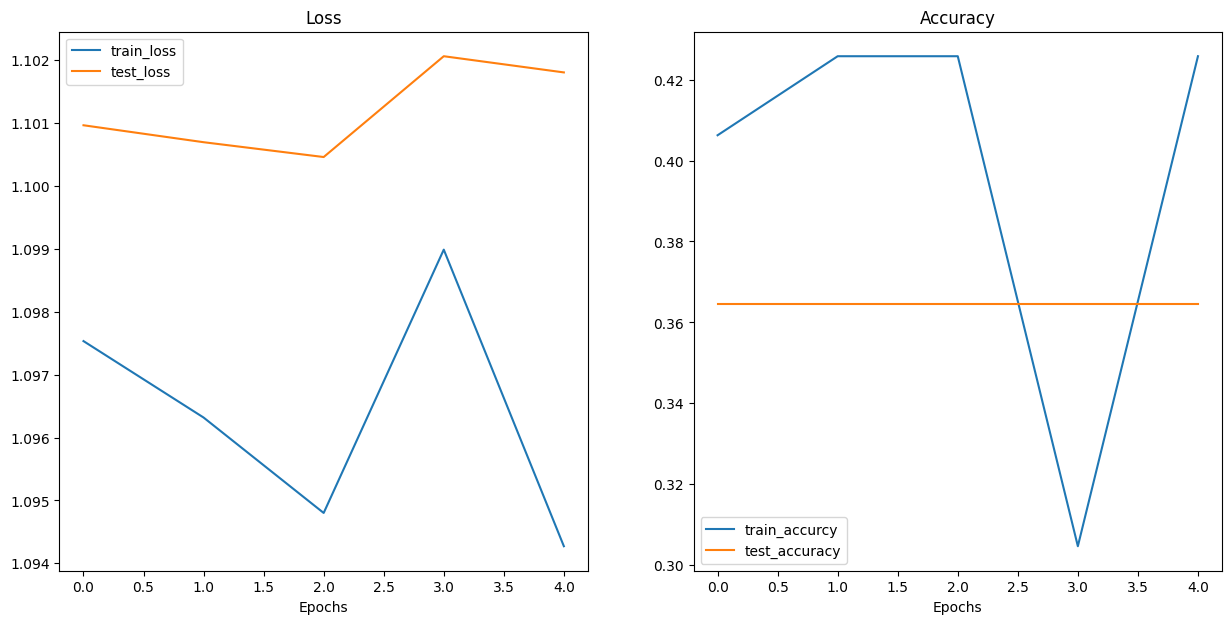

In [47]:
plot_loss_curves(model_1_results)

In [48]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.097532   0.250000   1.102871  0.197917
1    1.096795   0.398438   1.104422  0.197917
2    1.098332   0.292969   1.103995  0.187500
3    1.096331   0.382812   1.105571  0.197917
4    1.097107   0.292969   1.105097  0.177083

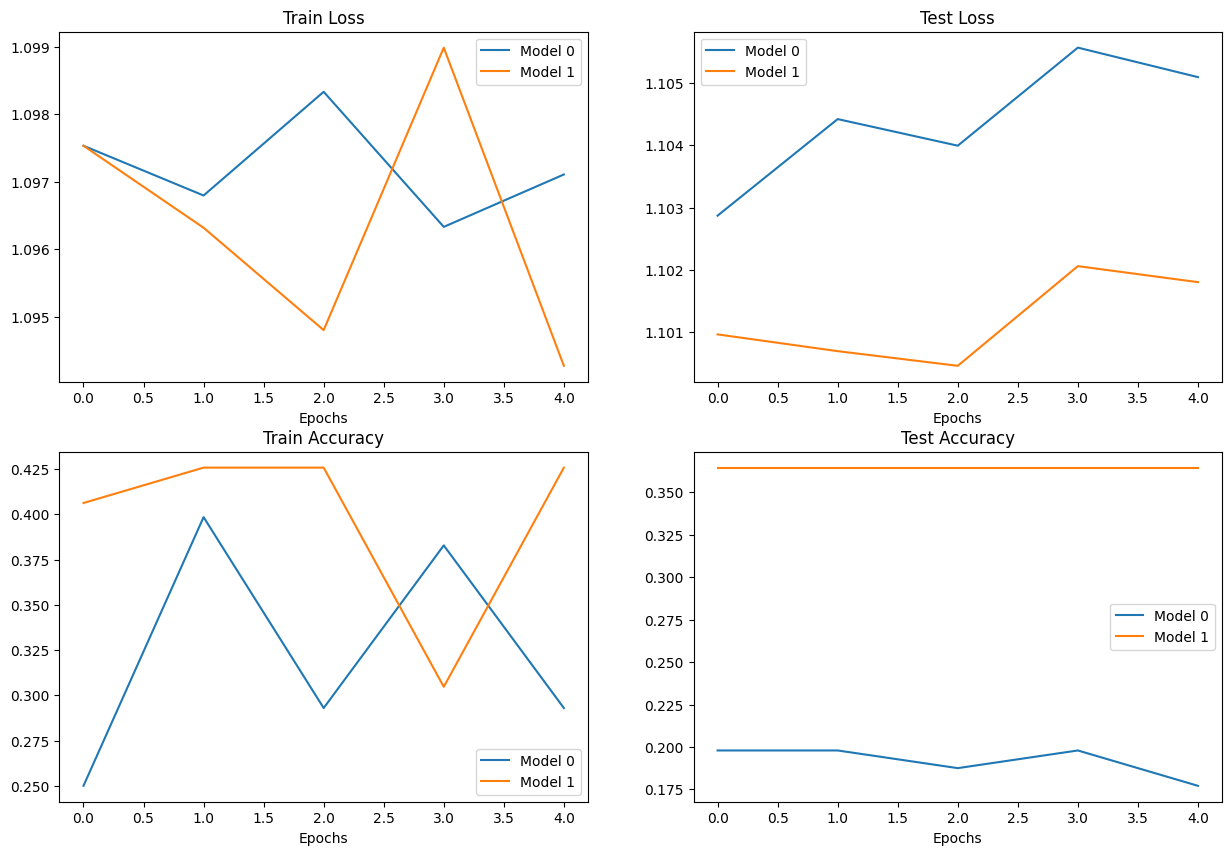

In [49]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();